# Linear regression

Import all the modules you will need in this notebook here:

In [314]:
# exercise 0
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import seaborn as sns


We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

<Axes: xlabel='AGE', ylabel='Count'>

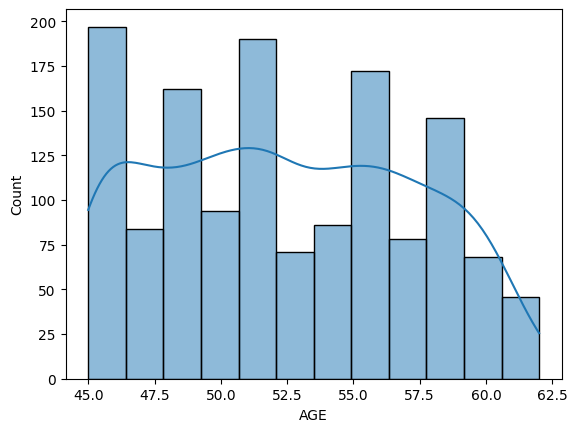

In [315]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename

import pandas as pd
file = get_path("fram.txt")
fram = pd.read_csv(file, sep = "\t")
fram.describe()

# sns.histplot(fram.AGE, kde=True)
    

Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [316]:
# exercise 2
def rescale(series):
    return (series - series.mean()) / (2*series.std())
    


Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [317]:
# exercise 3
fram["sAGE"] = rescale(pd.Series(fram.AGE))
fram["sSBP"] = rescale(pd.Series(fram.SBP))
fram["sFRW"] = rescale(pd.Series(fram.FRW))
fram["sDBP"] = rescale(pd.Series(fram.DBP))
fram["sCHOL"] = rescale(pd.Series(fram.CHOL))
fram["sCIG"] = rescale(pd.Series(fram.CIG))
fram["sDEATH"] = rescale(pd.Series(fram.DEATH))
fram["sYRS_DTH"] = rescale(pd.Series(fram.DEATH))
fram.describe()

# sns.histplot(fram.sAGE, kde=True)

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH,sAGE,sSBP,sFRW,sDBP,sCHOL,sCIG,sDEATH,sYRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512,2.879890e-16,-2.446632e-16,2.854404e-16,-3.211205e-16,-2.242746e-16,8.155440e-17,-1.427202e-16,-1.427202e-16
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000,-1.554141e+00,-2.072870e+00,-3.006065e+00,-2.821237e+00,-2.994243e+00,-6.931385e-01,-5.309992e-01,-5.309992e-01
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000,-9.267233e-01,-6.454230e-01,-6.401996e-01,-7.124570e-01,-7.482084e-01,-6.931385e-01,-5.309992e-01,-5.309992e-01
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000,-9.016686e-02,-2.171890e-01,-1.332284e-01,-9.530354e-03,-1.003137e-01,-6.931385e-01,-5.309992e-01,-5.309992e-01
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000,7.463895e-01,4.251620e-01,4.864030e-01,5.528110e-01,6.339670e-01,1.033360e+00,-5.309992e-01,-5.309992e-01
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000,2.001224e+00,5.421226e+00,6.570057e+00,4.910956e+00,4.218984e+00,4.486358e+00,2.590945e+00,2.590945e+00


Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [318]:
# exercise 4
fit = smf.ols("SBP ~ sFRW + SEX + sCHOL", data = fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           4.13e-40
Time:                        13:51:52   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [319]:
# exercise 5
fit = smf.ols("SBP ~ sFRW + SEX + sCHOL + sAGE", data = fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           2.44e-46
Time:                        13:51:52   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***

Based on the increase of the R-squared and adjusted R-squared parameters, the increase of the explanatory power of the model is not huge but it's still significant in the context of improving the model. Based on the coefficient values, the variable that explains the variance the most is the weight of the person.  

***

Try to add to the model all the interactions with other variables. 

In [320]:
# exercise 6
fit = smf.ols("SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sCHOL:SEX + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL", data = fram).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           4.92e-43
Time:                        13:51:52   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.00

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     4.541
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           0.000318
Time:                        13:51:52   Log-Likelihood:                -621.33
No. Observations:                 141   AIC:                             1257.
Df Residuals:                     134   BIC:                             1277.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    154.3516     13.809     11.177      0.0

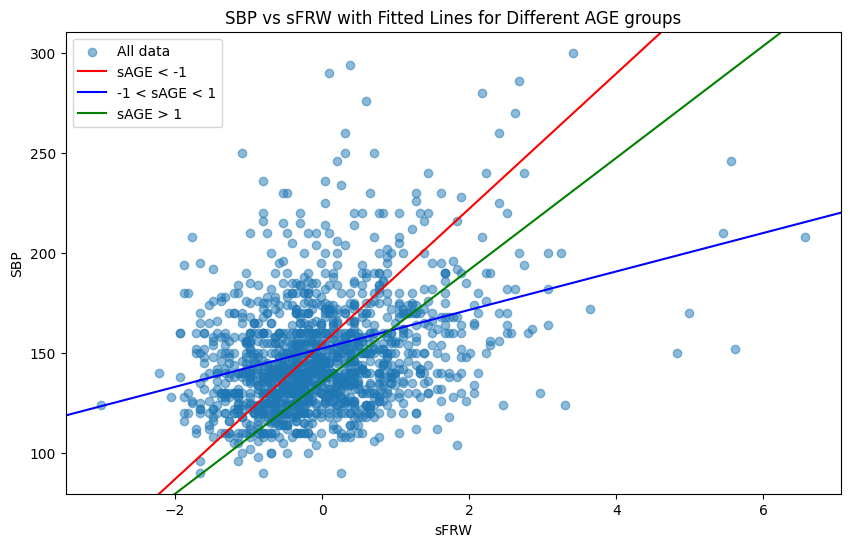

In [321]:
# exercise 7
age1 = fram[(fram['SEX'] == 'female') & (fram['sAGE'] < -0.5)]
age2 = fram[(fram['SEX'] == 'female') & (fram['sAGE'] > -0.5) & (fram['sAGE'] < 0.5)]
age3 = fram[(fram['SEX'] == 'female') & (fram['sAGE'] > 0.5)]
# female = fram[(fram['SEX'] == 'female')]

# Luo mallit jokaiselle alijoukolle
fit1 = smf.ols("SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sCHOL:SEX + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL", data=age1).fit()
fit2 = smf.ols("SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sCHOL:SEX + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL", data=age2).fit()
fit3 = smf.ols("SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sCHOL:SEX + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL", data=age3).fit()
# fit_female = smf.ols("SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sCHOL:SEX + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL", data=female).fit()

p1 = fit1.params
p2 = fit2.params
p3 = fit3.params
# print(fit1.summary())


# Luo scatter plot ja fitted lines samaan kuvaan
plt.figure(figsize=(10, 6))

# Kaikki datapisteet samaan scatterplottiin
plt.scatter(fram['sFRW'], fram['SBP'], alpha=0.5, label='All data')

# Lisää fitted lines eri väreillä
abline_plot(intercept=p1.Intercept, slope=p1.sFRW, ax=plt.gca(), color='red', label='sAGE < -0.5')
abline_plot(intercept=p2.Intercept, slope=p2.sFRW, ax=plt.gca(), color='blue', label='-0.5 < sAGE < 0.5')
abline_plot(intercept=p3.Intercept, slope=p3.sFRW, ax=plt.gca(), color='green', label='sAGE > 0.5')

# Otsikko ja akselien nimet
plt.title('SBP vs sFRW with Fitted Lines for Different AGE groups')
plt.xlabel('sFRW')
plt.ylabel('SBP')
plt.legend()






How does the dependence of blood pressure on weight change as a person gets older?
***

The chart does not give a clear answer to the question on the dependence of blood pressure on weight. Accordign to the chart, the youngest group seem to have the highest risk of SBP whereas the mid-aged group has the lowest risk of SBP. The reasons for this incoherence might be related to the group sizes - the youngest and the oldest groups are significantly smaller in size compared to the mid-aged group. This can lead to a situation where some of the variables become statistically insignificant and the results become unreliable.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

                            OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           2.99e-40
Time:                        13:51:52   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.16

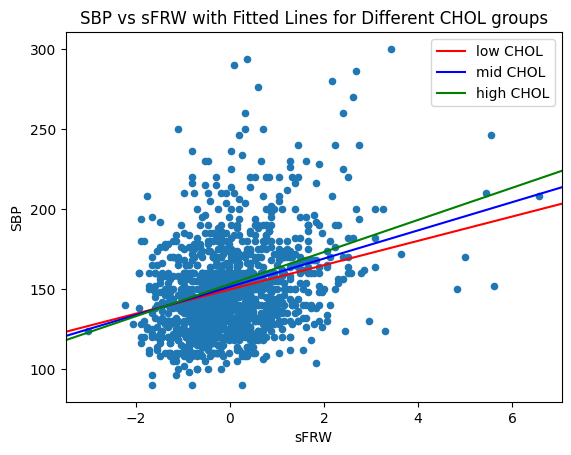

In [322]:
# exercise 8
# Luo mallit jokaiselle alijoukolle
fit = smf.ols("SBP ~ sFRW + SEX + sFRW:SEX + sCHOL + sCHOL:sFRW + sCHOL:SEX + sAGE + sAGE:sFRW + sAGE:SEX + sAGE:sCHOL + sCIG + sCIG:sFRW + sCIG:SEX + sCIG:sCHOL + sCIG:sAGE", data=fram).fit()
p = fit.params

print(fit.summary())

# Kaikki datapisteet samaan scatterplottiin
fram.plot.scatter("sFRW", "SBP")

# Lisää fitted lines eri väreillä
abline_plot(intercept=p.Intercept - p["sCHOL"], slope=p.sFRW - p["sCHOL:sFRW"], ax=plt.gca(), color='red', label='low CHOL')
abline_plot(intercept=p.Intercept, slope=p.sFRW, ax=plt.gca(), color='blue', label='mid CHOL')
abline_plot(intercept=p.Intercept + p["sCHOL"], slope=p.sFRW + p["sCHOL:sFRW"], ax=plt.gca(), color='green', label='high CHOL')

# Otsikko ja akselien nimet
plt.title('SBP vs sFRW with Fitted Lines for Different CHOL groups')
plt.xlabel('sFRW')
plt.ylabel('SBP')
plt.legend()


How does the model and its accuracy look?

***

The model looks okay but it could be still improved. Including all the interaction variable in the model does not make sense based on the note that some of their p-values are relatively high. However, the chart is more or less aligned with the expectations - the older the female person is the higher correlation between weight and SBP is. 

***

# Logistic regression

In [323]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [324]:
# exercise 9

fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.map(int)

fit = smf.glm("HIGH_BP ~ sFRW + SEX + SEX:sFRW", data = fram, family=sm.families.Binomial()).fit()
error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) |
                     ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(error_rate_orig)


0.35581061692969873


Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [325]:
# exercise 10
fit = smf.glm("HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data = fram, family=sm.families.Binomial()).fit()
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) |
                     ((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
print(error_rate_orig)


0.35581061692969873


Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

                 Generalized Linear Model Regression Results                  
Dep. Variable:                HIGH_BP   No. Observations:                  462
Model:                            GLM   Df Residuals:                      458
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -257.60
Date:                Mon, 12 Aug 2024   Deviance:                       515.20
Time:                        13:51:52   Pearson chi2:                     452.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.06308
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9414      0.108      8.702      0.0

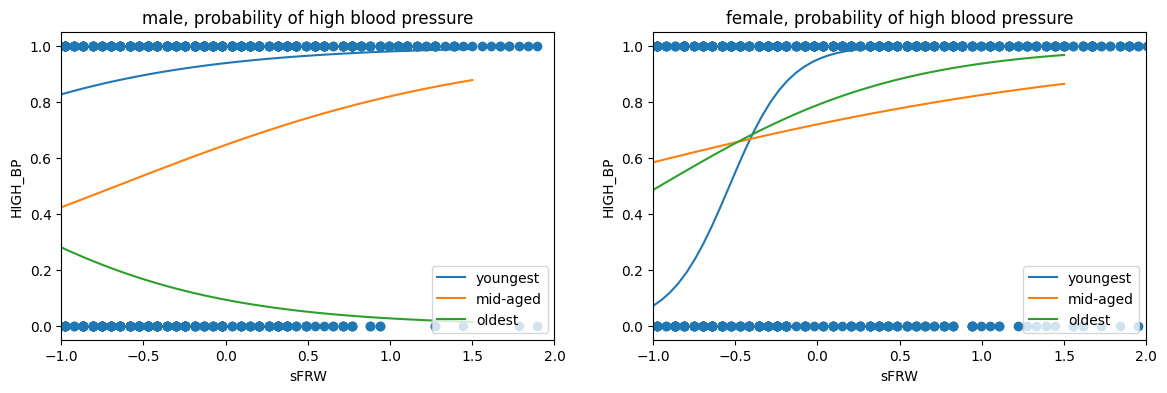

In [326]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

#datasetit
male = fram[(fram["SEX"] == "male")]
female = fram[(fram["SEX"] == "female")]
male1 = fram[(fram["SEX"] == "male") & (fram["sAGE"] < -0.5)]
male2 = fram[(fram["SEX"] == "male") & (fram["sAGE"] > -0.5) & (fram["sAGE"] < 0.5)]
male3 = fram[(fram["SEX"] == "male") & (fram["sAGE"] > 0.5)]
female1 = fram[(fram["SEX"] == "female") & (fram["sAGE"] < -0.5)]
female2 = fram[(fram["SEX"] == "female") & (fram["sAGE"] > -0.5) & (fram["sAGE"] < 0.5)]
female3 = fram[(fram["SEX"] == "female") & (fram["sAGE"] > 0.5)]

#mallit
fit_male1 = smf.glm("HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data = male1, family=sm.families.Binomial()).fit()
fit_male2 = smf.glm("HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data = male2, family=sm.families.Binomial()).fit()
fit_male3 = smf.glm("HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data = male3, family=sm.families.Binomial()).fit()
fit_female1 = smf.glm("HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data = female1, family=sm.families.Binomial()).fit()
fit_female2 = smf.glm("HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data = female2, family=sm.families.Binomial()).fit()
fit_female3 = smf.glm("HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data = female3, family=sm.families.Binomial()).fit()

print(fit_female2.summary())

fig, ax = plt.subplots(1, 2, subplot_kw={"xlabel":"sFRW", "ylabel":"HIGH_BP", "xlim":(-1, 2)}, figsize=(14,4))
ax[0].scatter(male.sFRW, male.HIGH_BP)
X = np.linspace(-1, 1.5, 50)
ax[0].plot(X, logistic(X*fit_male1.params.sFRW + fit_male1.params.Intercept), label="youngest")
ax[0].plot(X, logistic(X*fit_male2.params.sFRW + fit_male2.params.Intercept), label="mid-aged")
ax[0].plot(X, logistic(X*fit_male3.params.sFRW + fit_male3.params.Intercept), label="oldest")
ax[0].set_title("male, probability of high blood pressure")
ax[0].legend(loc="lower right")

ax[1].scatter(female.sFRW, female.HIGH_BP)
X = np.linspace(-1, 1.5, 50)
ax[1].plot(X, logistic(X*fit_female1.params.sFRW + fit_female1.params.Intercept), label="youngest")
ax[1].plot(X, logistic(X*fit_female2.params.sFRW + fit_female2.params.Intercept), label="mid-aged")
ax[1].plot(X, logistic(X*fit_female3.params.sFRW + fit_female3.params.Intercept), label="oldest")
ax[1].set_title("female, probability of high blood pressure")
ax[1].legend(loc="lower right")





How do the models with different ages and genders differ from each other?

***
Between the genders, females seem to have a higher risk of having high blood pressure compared to men across all age groups (except for the youngest).

For males, there seems to be a high variance among the different age groups which in this context may indicate that the samples size is not sufficient for a reliable result. For example, for the youngest group, can be seen from the model summary that the p-values for all variables are relatively high which makes the result statistically unreliable. For the mid-aged group the sample size is clearly higher compared to other groups and therefore the p-values of the variables are lower which makes the result more reliable. 

For females, the youngest group seems to have the highest probability of high blood pressure similarly as wihin males. But there also seems to be the same issue with the sample size and the unreliability. When comparing the mid-aged groups between males and females, the probability of high blood pressure is higher for females which is aligned with the expectations.
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [327]:
# exercise 12
def train_test_split(df, train_fraction=0.8):
    df_all = df
    df_train = df.sample(frac=train_fraction)
    df_test = df_all.drop(df_train.index)
    return df_train, df_test

train, test = train_test_split(fram)



Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [328]:
# exercise 13
error_model = []
error_null = []
np.random.seed(1)
for i in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm("HIGH_BP ~ sFRW + SEX + SEX:sFRW + sAGE + sAGE:sFRW + sAGE:SEX", data=train, family=sm.families.Binomial()).fit()
    pred = fit.predict(test, transform=True)

    error_rate = np.mean(((pred < 0.5) & (test.HIGH_BP==1)) |
                     ((pred > 0.5) & (test.HIGH_BP==0)))
    error_model.append(error_rate)
    

pred_accuracy = 1 - pd.Series(error_model).mean() 
print(pred_accuracy)



0.6688172043010753


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [329]:
# exercise 14
fram["hasCHD"] = fram["CHD"] > 0
fram["hasCHD"] = fram["hasCHD"].map(int)
fram.hasCHD.mean()


np.float64(0.22022955523672882)

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [337]:
# exercise 15
fit = smf.glm("hasCHD ~ sCHOL + sCIG + sCHOL:sCIG + sFRW + sFRW:sCHOL + sFRW:sCIG", data = fram, family=sm.families.Binomial()).fit()
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.hasCHD) |
                    ((fit.fittedvalues > 0.5) & ~fram.hasCHD))
fit.summary()
print(error_rate)

0.22022955523672882


Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

Text(0, 0.5, 'Probability of CHD')

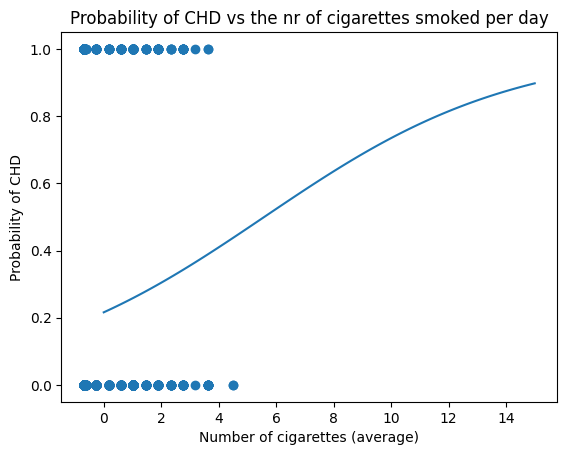

In [335]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

plt.scatter(fram["sCIG"], fram["hasCHD"])
x = np.linspace(0, 15, 100)
plt.plot(x, logistic(x*fit.params.sCIG + fit.params.Intercept))

plt.title('Probability of CHD vs the nr of cigarettes smoked per day')
plt.xlabel('Number of cigarettes (average)')
plt.ylabel('Probability of CHD')

pred = fit.predict()



Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
The error rate of the model is 0.22. This means that the accuracy score of the model is 0.78 which makes the model fairly good also in practical use.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [381]:
# exercise 17
fit = smf.glm("hasCHD ~ sCHOL + sCIG + sCHOL:sCIG + sFRW + sFRW:sCHOL + sFRW:sCIG", data = fram, family=sm.families.Binomial()).fit()

sCIG = (17 - fram.CIG.mean()) / (2*fram.CIG.std())
sCHOL = (200 - fram.CHOL.mean()) / (2*fram.CHOL.std())
sFRW = (100 - fram.FRW.mean()) / (2*fram.FRW.std())

point = {
    "sCIG":sCIG,
    "sCHOL":sCHOL,
    "sFRW":sFRW,
    'sCHOL:sCIG':sCHOL * sCIG,
    'sFRW:sCHOL':sFRW * sCHOL,
    'sFRW:sCIG':sFRW * sCIG
}

predicted = fit.predict(pd.DataFrame([point]))[0]
print(predicted)



0.21556850551856524
